In [100]:
import numpy as np
import torch
import torch.nn as nn
from svdnet.dataset import *


superspace_d = 10
subspace_d = 5

n_basis = int(1e4)
n_samples = int(1e4)
dataset = []
# Generate the true basis vectors of the lower-dimensional subspace
basis = torch.randn(n_basis, subspace_d)
# Generate random points in the larger subspace
for base_index in range(n_basis):
    points = torch.randn(n_samples,subspace_d)
    # print(basis[base_index],points.size())
    # projections = points - (points @ basis[base_index]) * basis[base_index]
    # projections = projections / torch.norm(projections, dim=1, keepdim=True)
    # dataset.append(projections)
normal = torch.tensor([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=torch.float)
points = torch.randn(1000, 10)
points - (points @ normal.unsqueeze(1)) * normal



# Normalize the points
# points = (points - points.mean(axis=0)) / points.std(axis=0)

# # Split the data into training, validation, and test sets
# train_points, val_points, test_points = map(
#     lambda x: torch.from_numpy(x), np.split(points, [70,80]))
# train_basis, val_basis, test_basis = map(
#     lambda x: torch.from_numpy(x), np.split(basis, [70,80]))
# print(dataset[0])
normal.unsqueeze(1)



tensor([[1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [76]:

class BasisModel(nn.Module):
  def __init__(self, input_size, output_size):
    super(BasisModel, self).__init__()
    self.fc1 = nn.Linear(input_size, 32)
    self.fc2 = nn.Linear(32, 16)
    self.fc3 = nn.Linear(16, output_size)

  def forward(self, x):
    x = x.to(self.fc1.weight.dtype)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    return x

input_size = 10
output_size = 5

model = BasisModel(input_size, output_size)
def mse_loss(pred, true):
  return ((pred - true)**2).mean()

loss_fn = mse_loss

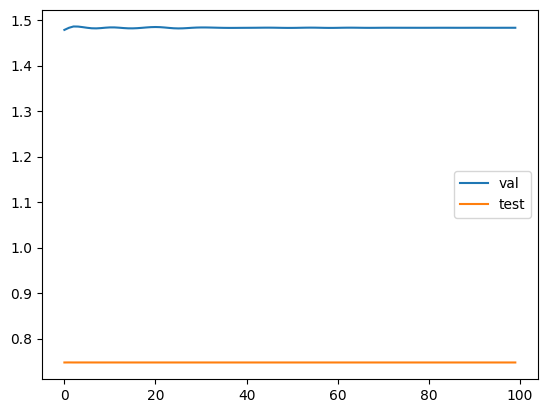

In [85]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())
val_losses=[]
losses=[]
import matplotlib.pyplot as plt
# Training loop
for epoch in range(100):
  # Zero the gradients
  optimizer.zero_grad()

  # Forward pass
  predictions = model(train_points)

  # Compute the loss
  loss = loss_fn(predictions, train_basis)

  # Backward pass
  loss.backward()

  # Update the parameters
  optimizer.step()

  # Evaluate the model on the validation set
  val_predictions = model(val_points)
  val_loss = loss_fn(val_predictions, val_basis)

  # Print the loss and validation loss
  # print(f'Epoch {epoch+1}: loss = {loss:.3f}, val_loss = {val_loss:.3f}')
  val_losses.append(val_loss)
  losses.append(loss)
plt.plot(torch.tensor(val_losses),label='val')
plt.plot(torch.tensor(losses),label='test')
plt.legend()
plt.show()

